# Hotspots versus Private Locations
> Which is more popular?


## Description

This notebook looks at the numbers of Locations which are classified as hotspots 
compared to the number of private ones. Hotspots are "preferred" since it is 
easier to see what has been seen at popular locations. For private locations 
you have click on the link on the eBird checklist page to find out where it is.

In [5]:
from django.db import connection
from django.db.models.functions import Length
from django.template.loader import render_to_string

from IPython.display import display, HTML

import matplotlib.pyplot as plt
import tabulate

from ebird.api.data.models import Checklist, Location

In [7]:
# Location type - private versus hotspots

# Total number of locations
total = Location.objects.all().count()
# Total number of hotspots
hotspots = Location.objects.filter(hotspot=True).count()
# Total number of private/personal locations
private = Location.objects.filter(hotspot=False).count()

labels = ["Hotspot", "Private", "Total"]
values = [hotspots, private, total]
percentages = [round(value/total * 100, 1) for value in values]

data = zip(labels, values, percentages)

table = tabulate.tabulate(data, headers=["Length", "n", "%"], tablefmt='html')
table

Length,n,%
Hotspot,2397,13
Private,16000,87
Total,18397,100


## Are private locations created for incidental observations?

Protocol,n
Incidental,1378
Stationary,1189
Travelling,1993


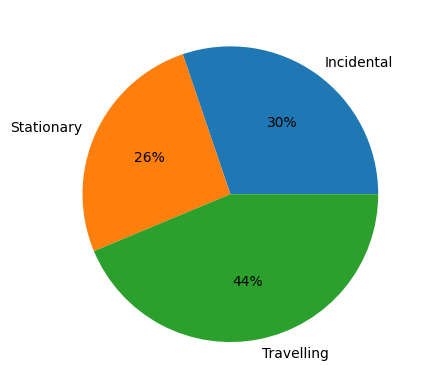

In [16]:
# A breakdown of hotspots by checklist protocol

labels = [
    "Incidental", 
    "Stationary", 
    "Travelling",
]

values = [
    Checklist.objects.filter(location__hotspot=True, protocol_code="P20").distinct("location_id").count(),
    Checklist.objects.filter(location__hotspot=True, protocol_code="P21").distinct("location_id").count(),
    Checklist.objects.filter(location__hotspot=True, protocol_code="P22").distinct("location_id").count(),
]

data = zip(labels, values)

table = tabulate.tabulate(data, headers=["Protocol", "n"], tablefmt='html')
display(HTML(table))

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.f%%');

Protocol,n
Incidental,7170
Stationary,3812
Travelling,5402


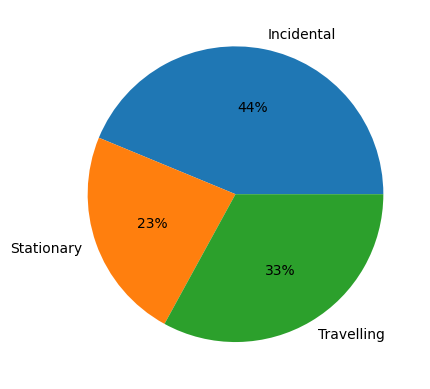

In [17]:
# A breakdown of private locations by checklist protocol

labels = [
    "Incidental", 
    "Stationary", 
    "Travelling",
]

values = [
    Checklist.objects.filter(location__hotspot=False, protocol_code="P20").distinct("location_id").count(),
    Checklist.objects.filter(location__hotspot=False, protocol_code="P21").distinct("location_id").count(),
    Checklist.objects.filter(location__hotspot=False, protocol_code="P22").distinct("location_id").count(),
]

data = zip(labels, values)

table = tabulate.tabulate(data, headers=["Protocol", "n"], tablefmt='html')
display(HTML(table))

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.f%%');